In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
ad = pd.read_csv("ad.csv")

In [19]:
ad.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [22]:
ad = ad.drop("Unnamed: 0",axis=1)

In [23]:
ad.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9



In linear regression, a response can 
be related to a predictor Y in the form of
 y = beta_0 +  beta_1 * X + error

There are two unknown constants that we need to estimate, 
the intercept beta_0 and the slope, beta_1. These are also 
called coefficients or parameters. Once they are estimated, 
the estimated fit becomes y_hat = beta_0_hat +  beta_1_hat * X


In [25]:
#we will use the np.ployfit function which performs least square polynomial
#fit. It fits a polynomial p(x) = p[0] * x**deg + ... + p[deg] of degree 
#deg to points (x, y). Returns a vector of coefficients p that minimises 
#the squared error in the order deg, deg-1, … 0.

fit = np.polyfit(ad['TV'], ad['sales'], deg = 1)
fit

array([0.04753664, 7.03259355])

In [27]:
y_hat = fit[1] + ad["TV"] * fit[0]

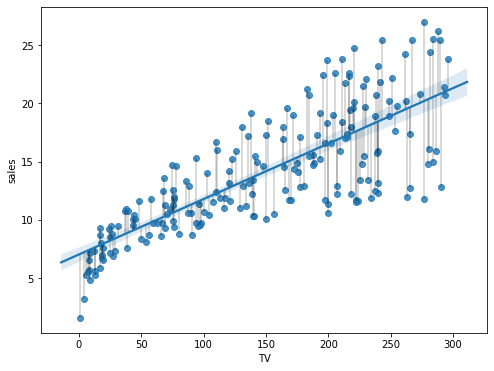

In [30]:
#let us plot the graph
plt.figure(figsize=(8,6))
sns.regplot("TV", "sales", data = ad)
plt.vlines(ad["TV"], y_hat, ad["sales"], lw = 0.3)
#the role of the vline function" Plot vertical lines at each x 
#from ymin to ymax.

Many lines can be arbitrarily drawn through the advertising data above. Typically the line that minimizes the sum of squared error (RSS) between the points and the estimate.
Different values of the parameters each produce different values of the mean squared error (the metric used to determine the best fit). We will now have a look at a number of combinations of beta_0 and beta_1 through contour lines which will show the error of each combination and plot a corresponding 3d plot. the central point in each figutr, theoritically, will be the point where MSE is minimized

# Choosing the Best Parameters

In [31]:
#let us assign different values to beta_0 and beta_1
b0 = np.linspace(5, 9, 50)
b1 = np.linspace(0.03, 0.07, 50)
#function of linspace: Returns num evenly spaced samples, 
#calculated over the interval [start, stop].

#now that we have defined the different possible values of the parameter
#it is time to calculate the errors
errors = np.array([np.mean((ad["sales"].values - (b_0 + b_1 *ad["TV"].values)) **2) for
                  b_1 in b1 for b_0 in b0])

In [32]:
B0, B1 = np.meshgrid(b0, b1)

In [33]:
errors_mesh = errors.reshape(B0.shape)

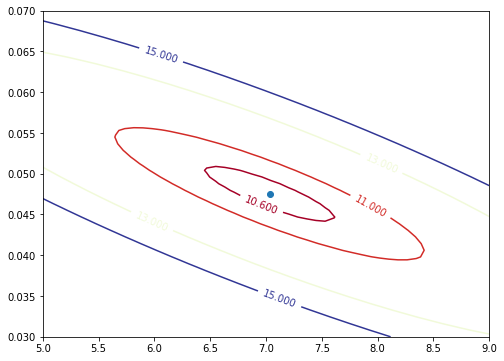

In [34]:
cmap = plt.cm.RdYlBu
plt.figure(figsize=(8,6))
cs = plt.contour(B0, B1, errors_mesh, cmap=cmap, levels=[10.6, 11, 13, 15])
manual_locations = [(7, .05)]
plt.clabel(cs, inline=1, fontsize=10)
plt.scatter(fit[1], fit[0]);

# Assessing the Accuracy of Our Estimates

Roughly speaking, standard error tells us the average amount that an estimate differes from the actual value. Var(Coeff) = SE(Coeff)^2 = sigma^2 / n where sigma is the standard sitribution of the original set of n points.

In general, sigma^2 is not known but that can be estimated from the data. The estimate of sigma is known as <strong> residual standard error </strong>which is given by the formula RSE = (RSS/ (n-2)) ** 0.5

Standard errors can also be used to calculate the confidence intervals. A 95% confidence interval is defined as a range of values such that with 95% probability, the range will contain the true unknown value of the parameter.

Standard errors can also be used to perform hypothesis testing. The most common hypothesis test involves testing whether a particular predictor is <strong> significant </strong> or not. 

The null hypothesis H_0: beta_1 = 0 

is tested against the alternative H_a: beta_1 not equal to 0 

This is calculated through the equation beta_1_hat / SE(beta_1_hat)
This result is called the T-Statistic. The t-distribution is then used to determine the percentage of time that a random value would fall beyond this t-statistic. This percentage is called the <strong> p-value </strong>. It is used as a tool of measurement to check how extreme the results of your data are. The smaller the p-value, the more extreme the results and the more likelihood of them not coming from randomness. The most common p-value encountered is 0.05






# Accuracy of the Model
It is natural to quantify the extent to which the model fits the data. This can be done by assessing RSE or R^2 Statistic or measuring how much better the model does than randomness.

## Randomness
For this, there must be a model for randomness and that model is not just randomly choosing a point but actually choosing the mean of all the points.


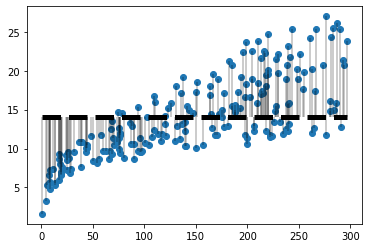

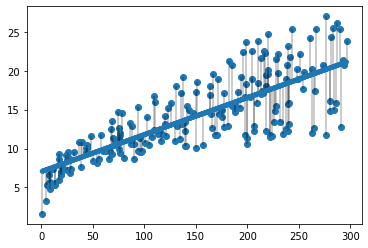

In [40]:
fig = plt.figure()
plt.scatter(ad['TV'], ad['sales'])
plt.hlines(ad['sales'].mean(), ad['TV'].min(), ad['TV'].max(), linestyle='--', lw=5)
#purpose of hlines: Plot horizontal lines at each y from xmin to xmax.
plt.vlines(ad['TV'], ad['sales'].mean(), ad['sales'], lw=.4)
#plt.set_title("Model for Randomness: Mean", fontsize=20)
plt.show()

fig = plt.figure()
plt.scatter(ad['TV'], ad['sales'])
plt.plot(ad['TV'], ad['TV'] * fit[0] + fit[1], lw=5)
plt.vlines(ad['TV'], ad['TV'] * fit[0] + fit[1], ad['sales'], lw=.4)
#plt.set_title("Linear Regression Model", fontsize=20)
plt.show()

# Errors using the Mean and Errors using the Model
As you can see above the errors when using the mean are greater than the errors using the model. Lets plot a histogram of the absolute value of the errors of each to more easily view what is taking place. Looking at the histogram its obvious that a the model is producing a better fit.

In [41]:
errors_mean = abs(ad['sales'] - ad['sales'].mean())
errors_model = abs(ad['sales'] - (ad['TV'] * fit[0] + fit[1] ))

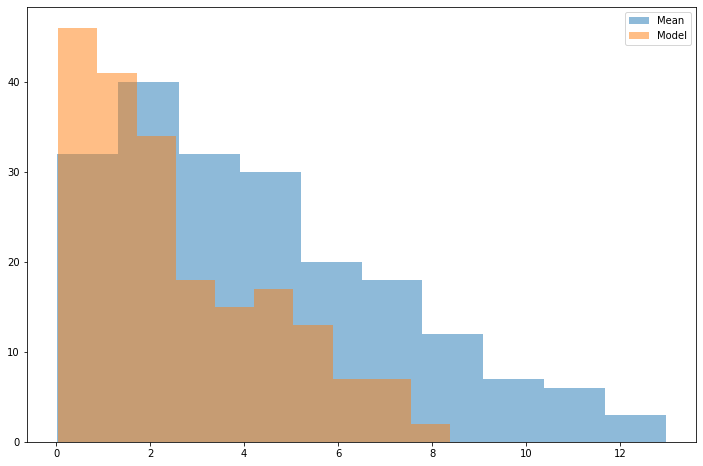

In [42]:
plt.figure(figsize=(12, 8))
plt.hist(errors_mean, alpha = .5, label="Mean")
plt.hist(errors_model, alpha=.5, label="Model")
plt.legend()

In [43]:
#How many times does the model perform better than the mean
(errors_model < errors_mean).mean()

0.715

The sum of squared total (SST) is defined as the sum of all the squared deviations from the mean. This is a good measurement for calculating the variance in the model. SUM((y - y_mean)^2). 
The sum of squared erros (SSE) is how much error there is in the model. SUM((y_hat - y)^2)
The sum of squared regression (SSR) is defined as the sum of squared differences between the regression line and the mean. SUM((y_hat - y_mean)^2)
Mathematically we have the equality: SST = SSR + SSE


In [44]:
SST = (errors_mean ** 2).sum()
SSE = (errors_model ** 2).sum()
SST, SSE

(5417.14875, 2102.530583131351)

R^2 is a statistic that can tell us what percentage of the total variation has been explained by the model. Calculating 1 -SSE / SSt would give us the total amount of variation captured by the model. A number which is close to 1 would indicate that the model fits the data very well.

In [45]:
1 - SSE / SST

0.6118750508500712

Now that we have practised linear regression in detail for one set of the data, we can calculate it for other sets through statsmodels.formula.api

In [46]:

import statsmodels.formula.api as smf

In [48]:
results = smf.ols('sales ~ TV', data=ad).fit()

In [49]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           1.47e-42
Time:                        11:27:58   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# Simple linear regression with newspaper
results = smf.ols('sales ~ newspaper', data=ad).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Tue, 10 Sep 2019   Prob (F-statistic):            0.00115
Time:                        11:28:43   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# Simple linear regression with newspaper
results = smf.ols('sales ~ radio', data=ad).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           4.35e-19
Time:                        11:29:14   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Multiple Regression
The approach of fitting a seperate linear regression model fit for each predictor is not entirely satisfactory. A better approach is to extend the simple regression model for each predictor so that it can accomodate all of them. We can do so by giving each predictor a seperate slope coefficient in a single model. In general suppose that we have p distinct predictors, then the multiple regression model takes the form of 
<strong> Y = beta_0 + beta_1 * X_1 + beta_2 * X_2 ..... + epsilon </strong>. Here X_j is the jth predictor and beta_j quantifies the association between the variable and the response

# Example

In [54]:

results = smf.ols('sales ~ TV + newspaper + radio', data=ad).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           1.58e-96
Time:                        11:45:02   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
radio          0.1885      0.009     21.893      0.000       0.172       0.206
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see from the above summary, newspaper is the least highly correlated with the response which is sales in this case.

In [55]:
ad.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


# Null Hypothesis Testing in Multiple Linear Regression
The null hypothesis expands gere to say that all the coefficients are equal to 0. The alternative hypothesis on the other hand says that only one of them is significant. An F Test is performed to test for significance. 
<strong> F = (SST - SSE) / p / SSE / (n - p -1) </strong>

## Looking at a subset of the model (what are the important variables)
In the advertisement model, it is clear that newspaper does not appear to have a significant relationship with sales and hence it would be a ideal candidate to be dropped from the model.
ideally we would like to perform variable selection nu trying out a lot of different models. Unfortunately there are a total of 2^p models that contain subset of p variables. For a large p, this won't be practical. We have the following choices:
### Forward Selection
begin with the null model. We fit p simple linear regressions and add it to the null model that variable that results in the lowest RSS. We then add to that model the variable that results in the lowest RSS for the new two variable model. This is continued till the stopping rule is satisfied
### Backward Selection
We start with all the variables in the model and remove the one with the largest p value. Continued till the stopping rule is reached.
### Mixed Selection
It is a combination of forward and backward selection. We start with an empty model and implement forward selection. At any point if the p-value of any variable risesabove a certain threshold, remove that variable

# Other Considerations in Regression Model
## Qualitative Predictors
Some predictos can be qualitative in nature. Let us now look at predictors with only two levels. Ex: Credit Card balance between male and female. If a qualitative predictor (like gender) only has two levels, then incorporating it into the model is very easy. We simply create a dummy variable that takes on two possible values <strong> X_i = -1 if the person is male and -1 if the person is female</strong>. and use this variable in the regression equation.
<strong> Y_i = beta_0 + beta_1 * X_1 if the person is female
               beta_0 - beta_1 * X_1 if the person is male</strong>


In [56]:
credit = pd.read_csv('Credit.csv')

In [57]:
credit['Female'] = (credit.Gender == 'Female').astype(int)

In [58]:
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Female
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964,1
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0


In [59]:
credit = credit.drop("Unnamed: 0", axis = 1)

In [60]:
results = smf.ols('Balance ~ Female', data=credit).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Tue, 10 Sep 2019   Prob (F-statistic):              0.669
Time:                        12:15:23   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    509.8031     33.128     15.389      0.000     444.675     574.931
Female        19.7331     46.051      0.429      0.669     -70.801     110.267
==============================================================================
Omnibus:                       28.438   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.346
Skew:                           0.583   Prob(JB):                     1.15e-06
Kurtosis:                       2.471   Cond. No.                         2.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
credit[credit['Female'] == 0]['Balance'].mean(), credit[credit['Female'] == 1]['Balance'].mean()

(509.8031088082902, 529.536231884058)

# Extensions of the Linear Model
The Standard linear regression model provides interpretable results. however, it makes several highly restrive assumptions that are often violated in practise: relationship between predictors and  and response is additive and linear. The additive assumption means that the effect of changes in a predictor X_j on the response Y is independent of the values of the other predictors. The linear assumption states that the change in response Y due to a one unit change in X_j is constant constant regardless of the value of X_j.

## Removing the additive assumption
One way to extend the model to allow for the interaction effects is to include a third predictor called an interaction term, which is constructed by computing the product of X_1 and X_2. As a result, the efferct of X_1 on Y is no longer constant. Adjusting X_2 will change the impact o X_1 on Y.

## Non-Linear Relationships
A simple approach for incorporating non-linear associations ina  linear model is to include transformed versions of the predictors in the model.

# LAB

In [65]:
boston = pd.read_csv('boston.csv')
boston.head(10)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,NaN,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,NaN,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,NaN,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,NaN,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,NaN,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,NaN,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,NaN,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,NaN,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,NaN,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,NaN,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [66]:
boston =  boston.drop("Unnamed: 0", axis = 1)


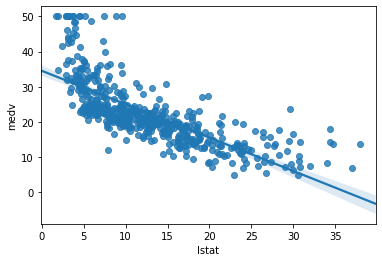

In [67]:
#we will look at medv as response and lsat as predictor
sns.regplot('lstat', 'medv', data=boston)

In [68]:
# statsmodels
results = smf.ols('medv ~ lstat', data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           5.08e-88
Time:                        12:41:13   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

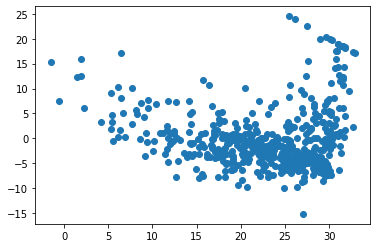

In [69]:
# look at residuals
plt.scatter(results.fittedvalues, results.resid)

In [70]:
#THere is a clear indication of non linearity. As a result, we need to use
#a different model
string_cols = ' + '.join(boston.columns[:-1])
results = smf.ols('medv ~ {}'.format(string_cols), data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 10 Sep 2019   Prob (F-statistic):          6.72e-135
Time:                        12:47:02   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
#the coefficient of age is very small, so there is no harm in dropping it
string_cols = ' + '.join(boston.columns[:-1].difference(['age']))
results = smf.ols('medv ~ {}'.format(string_cols), data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Tue, 10 Sep 2019   Prob (F-statistic):          6.08e-136
Time:                        12:48:15   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4369      5.080      7.172      0.000      26.456      46.418
black          0.0093      0.003      3.481      0.001       0.004       0.015
chas           2.6890      0.860      3.128      0.002       1.000       4.378
crim          -0.1080      0.033     -3.290      0.001      -0.173      -0.043
dis           -1.4786      0.191     -7.757      0.000      -1.853      -1.104
indus          0.0206      0.061      0.335      0.738      -0.100       0.141
lstat         -0.5239      0.048    -10.999      0.000      -0.617      -0.430
nox          -17.7135      3.679     -4.814      0.000     -24.943     -10.484
ptratio       -0.9522      0.130     -7.308      0.000      -1.208      -0.696
rad            0.3058      0.066      4.627      0.000       0.176       0.436
rm             3.8144      0.408      9.338      0.000       3.012       4.617
tax           -0.0123      0.004     -3.283      0.001      -0.020      -0.005
zn             0.0463      0.014      3.404      0.001       0.020       0.073
==============================================================================
Omnibus:                      178.343   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.386
Skew:                           1.523   Prob(JB):                    1.73e-171
Kurtosis:                       8.294   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
# Interaction
results = smf.ols('medv ~ lstat * age', data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           4.86e-88
Time:                        12:50:11   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
# Interaction
results = smf.ols('medv ~ lstat + np.power(lstat, 2)', data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Tue, 10 Sep 2019   Prob (F-statistic):          1.56e-112
Time:                        12:50:25   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             42.8620      0.872     49.149      0.000      41.149      44.575
lstat                 -2.3328      0.124    -18.843      0.000      -2.576      -2.090
np.power(lstat, 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
from statsmodels.stats.anova import anova_lm

In [75]:
results1 = smf.ols('medv ~ lstat', data=boston).fit()
results2 = smf.ols('medv ~ lstat + np.power(lstat, 2)', data=boston).fit()

anova_lm(results1, results2)

/Users/aviralsharma/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/aviralsharma/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/aviralsharma/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


In [76]:
(results1.ssr - results2.ssr) / (results2.ssr / results2.df_resid)

135.19982210087176